# PERSONAL REMITTANCES RECEIVED

https://migrationdataportal.org/themes/remittances


Personal remittances, received (current US$)

Personal remittances comprise personal transfers. Personal transfers consist of all current transfers in cash or in kind made or received by resident households to or from nonresident households. Personal transfers thus include all current transfers between resident and nonresident individuals.
Compensation of employees refers to the income of border, seasonal, and other short-term workers who are employed in an economy where they are not resident and of residents employed by nonresident entities. Data are the sum of two items defined in the sixth edition of the IMF's Balance of Payments Manual: personal transfers and compensation of 
employees. Data are in current U.S. dollars.


https://data.worldbank.org/indicator/BX.TRF.PWKR.CD.DT?end=2017&start=1970&view=chart


# THE OBJECTIVE OF THIS NOTEBOOK IS TO GET THE LIST OF TOP 10 COUNTRIES THAT RECEIVE PERSONAL REMITTANCE FUNDS AND COMPARING THE IMPACT OF THESE FUNDS TO THE COUNTRIES GDP

# Step 1 : Importing source file (CSV)


In [119]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import io

In [120]:
csv_1 ="Personal_remittances_Received.csv"

Data_2 = pd.read_csv(csv_1, encoding="ISO-8859-1")

Data_2
# file has 269 rows (country names) and many missing data

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.759777e+06,9.050279e+06,4.972067e+06,5.307263e+06,4.860335e+06,6.337951e+06,7.465211e+06,8.083713e+06,7.490433e+06,7.723418e+06
1,Afghanistan,AFG,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,7.629833e+07,1.068004e+08,3.620105e+08,1.789517e+08,2.044323e+08,3.292266e+08,2.497886e+08,3.413114e+08,3.680300e+08,3.782404e+08
2,Angola,AGO,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,8.208400e+07,1.623590e+05,1.797204e+07,2.047510e+05,4.034885e+07,3.663741e+07,3.097112e+07,1.111471e+07,3.988048e+06,1.418196e+06
3,Albania,ALB,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.865574e+09,1.716130e+09,1.586926e+09,1.551124e+09,1.420283e+09,1.281914e+09,1.420535e+09,1.290351e+09,1.305750e+09,1.310873e+09
4,Andorra,AND,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.388386e+10,3.175429e+10,3.778056e+10,4.056726e+10,4.755616e+10,4.897275e+10,5.470847e+10,5.097952e+10,5.112376e+10,5.535090e+10
6,United Arab Emirates,ARE,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,7.051444e+08,6.285424e+08,6.443007e+08,6.973796e+08,5.775330e+08,5.350044e+08,5.053469e+08,4.944335e+08,5.389994e+08,5.703194e+08
8,Armenia,ARM,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.904067e+09,1.439809e+09,1.669337e+09,1.798625e+09,1.914984e+09,2.192194e+09,2.078618e+09,1.491476e+09,1.382331e+09,1.538656e+09
9,American Samoa,ASM,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# There are so many periods and countries with NA, and list of Individual countries and Regions.

# Therefore I filter my data to pull only the 6 six most recent years - 2012 through 2017 

# Also filtered to includes rows of only countries with data

#(multiple countries summed) together. 

# Creating a new dataframe with only necessary columns, and using the WORLD value to get total remittances sent out yearly

In [121]:


D2_NEW = Data_2[['CountryName', 'CountryCode', 'IndicatorName','2012', '2013', '2014', '2015', '2016', '2017']].dropna(how = 'any')



D2_NEW['6YRS TOTAL'] = (D2_NEW['2012'] /1000000000 + D2_NEW['2013']/1000000000 + D2_NEW['2014']/1000000000 + D2_NEW['2015']/1000000000 + D2_NEW['2016']/1000000000 + D2_NEW['2017']/1000000000)

# dividing by 1 billion

D2_NEW['YEARLY AVG'] = (D2_NEW['6YRS TOTAL']/6)

D2_NEW

ALL_REC = D2_NEW.loc[D2_NEW['CountryName'] =='World']

#print(df.loc[df['A'] == 'foo'])

PR_WORLD = ALL_REC[['2012', '2013', '2014', '2015', '2016', '2017']]

PR_WORLD


,2012,2013,2014,2015,2016,2017
257,4.954650e+11,5.251820e+11,5.593580e+11,5.645080e+11,5.496880e+11,5.804930e+11


In [122]:
#TRANSPOSING COLUMNS TO ROWS 

FLIP = PR_WORLD.T.reset_index()

FLIP.rename(columns = {'index': 'Year', 257:'PR Received'}, inplace=True)


FLIP


,Year,PR Received
0,2012,4.954650e+11
1,2013,5.251820e+11
2,2014,5.593580e+11
3,2015,5.645080e+11
4,2016,5.496880e+11
5,2017,5.804930e+11


<IPython.core.display.Javascript object>


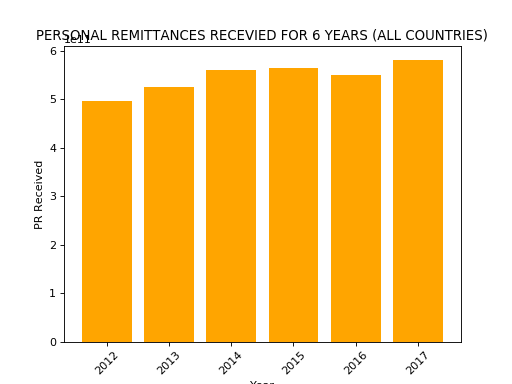

In [123]:
fig1 = plt.figure()


plt.bar(x=np.arange(6),color=('orange'),height=FLIP['PR Received'])

#Give it a title
plt.title("PERSONAL REMITTANCES RECEVIED FOR 6 YEARS (ALL COUNTRIES)")

#Give the x axis some labels across the tick marks.
#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
plt.xticks(np.arange(6), FLIP['Year'], rotation=45)

#Give the x and y axes a title
plt.xlabel("Year")
plt.ylabel("PR Received")

plt.savefig('PR_received_ALL.png')

In [124]:
Yr_Avg_PR_REC = round(FLIP["PR Received"].mean()/1000000000,2)

print(f" AN AVERAGE OF ${Yr_Avg_PR_REC} BILLION (DOLLARS) IS RECEIVED YEARLY ACROSS DIFFERENT COUNTRIES GLOBALLY")

 AN AVERAGE OF $545.78 BILLION (DOLLARS) IS RECEIVED YEARLY ACROSS DIFFERENT COUNTRIES GLOBALLY


# LIST OF TOP 10 COUNTRIES RECEIVING PERSONAL REMITTANCES

In [125]:
Top_10list = D2_NEW.nlargest(55, ['6YRS TOTAL']) 

#Top_10list

In [126]:
#Top_10list['CountryName'].unique()

In [127]:
# Manual selected the list of the TOP 10 COuntires. Excluding any conbined region 

Top10list = ('India', 'Philippines', 'China', 'Mexico', 'France','Nigeria', 'Egypt, Arab Rep.', 'Pakistan', 'Germany', 'Bangladesh')
DevelopmentClass = ('Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed','Developing')  
Region = ('South Asia', 'Asia', 'Europe', 'Central America', 'Europe', 'West Africa', 'North Africa', 'South Asia', 'South Asia', 'South Asia')

In [128]:
# Creating a Dataframe for the top 10 countries

In [129]:
TOP10_REC_1 = D2_NEW[D2_NEW.CountryName.isin(['India', 'Philippines', 'China', 'Mexico', 'France','Nigeria', 'Egypt, Arab Rep.', 'Pakistan', 'Germany', 'Bangladesh'])]

TOP10_REC_1

TOP10_REC_1['CountryClass'] = ['Developing', 'Developing', 'Developed', 'Developing', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing','Developing']

TOP10_REC_1['Region'] = ['South Asia', 'Asia', 'Europe', 'North Africa','Europe', 'South Asia', 'Central America',  'West Africa',   'South Asia', 'South Asia']

TOP10_REC_NEW = TOP10_REC_1[[ 'CountryName' , 'CountryClass' , 'Region', '2012', '2013' , '2014', '2015' , '2016', '2017', '6YRS TOTAL', 'YEARLY AVG']]

TOP10_REC_NEW.sort_values('6YRS TOTAL',ascending=False)

C:\Users\Ayoola\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ayoola\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,CountryName,CountryClass,Region,2012,2013,2014,2015,2016,2017,6YRS TOTAL,YEARLY AVG
107,India,Developing,South Asia,6.882052e+10,6.997036e+10,7.038864e+10,6.890969e+10,6.274436e+10,6.896718e+10,409.800754,68.300126
185,Philippines,Developing,South Asia,2.460968e+10,2.671684e+10,2.869080e+10,2.979940e+10,3.114197e+10,3.280977e+10,173.768457,28.961410
38,China,Developing,Asia,1.706562e+10,1.779011e+10,2.991050e+10,4.444530e+10,3.522558e+10,2.866612e+10,173.103233,28.850539
152,Mexico,Developing,Central America,2.320865e+10,2.318881e+10,2.480208e+10,2.623317e+10,2.869096e+10,3.227051e+10,158.394180,26.399030
75,France,Developed,Europe,2.267444e+10,2.441299e+10,2.535116e+10,2.405835e+10,2.405470e+10,2.488514e+10,145.436776,24.239463
172,Nigeria,Developing,West Africa,2.054296e+10,2.079713e+10,2.080607e+10,2.115772e+10,1.967939e+10,2.200071e+10,124.983983,20.830664
65,"Egypt, Arab Rep.",Developing,North Africa,1.923640e+10,1.783310e+10,1.957040e+10,1.832540e+10,1.869930e+10,2.368000e+10,117.344600,19.557433
182,Pakistan,Developing,South Asia,1.400700e+10,1.462900e+10,1.724400e+10,1.930600e+10,1.980800e+10,1.968900e+10,104.683000,17.447167
53,Germany,Developed,Europe,1.464319e+10,1.639770e+10,1.706859e+10,1.581152e+10,1.644714e+10,1.677691e+10,97.145065,16.190844
18,Bangladesh,Developing,South Asia,1.411963e+10,1.386695e+10,1.498753e+10,1.529554e+10,1.357429e+10,1.349823e+10,85.342167,14.223695


<IPython.core.display.Javascript object>


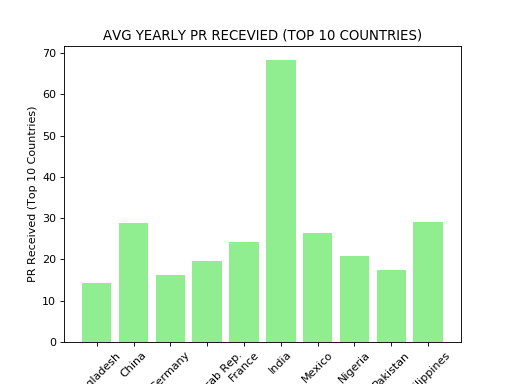

In [130]:
fig2= plt.figure()


plt.bar(x=np.arange(10),color=('lightgreen'),height=TOP10_REC_NEW['YEARLY AVG'])

#Give it a titlelt.title("AVG YEARLY PERSONAL REMITTANCES RECEVIED FOR 6 YEARS (ALL COUNTRIES)")

#Give it a title
plt.title("AVG YEARLY PR RECEVIED (TOP 10 COUNTRIES)")

#Give the x axis some labels across the tick marks.
#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
plt.xticks(np.arange(10), TOP10_REC_NEW['CountryName'], rotation=45)

#Give the x and y axes a title
plt.xlabel("CountryName")
plt.ylabel("PR Received (Top 10 Countries)")

plt.savefig('PR_received_TOP_10_Countries.png')

# TOP 10 PR RECEIVING COUNTRIES BY COUNTRY CLASS

<IPython.core.display.Javascript object>


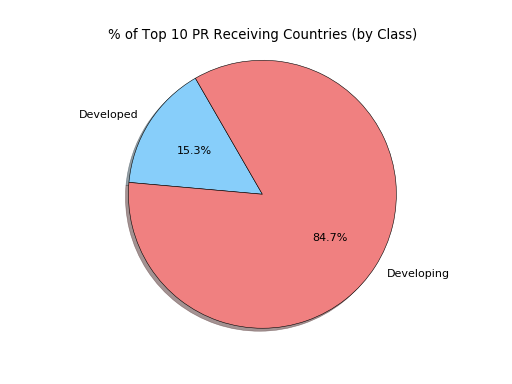

In [131]:
#group by type to be used by all pie charts
by_class = TOP10_REC_NEW.groupby('CountryClass')['CountryClass', 'CountryName', 'Region', '6YRS TOTAL']

fig3 = plt.figure()

#total fare by city
grp1 = by_class.sum()['6YRS TOTAL']

#pie chart build
labels = grp1.index


#colors and exploe the same for all pie charts, reference here
colors = [ 'lightskyblue', 'LightCoral']
explode = [0 , 0]
plt.pie(grp1, startangle = 120, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save chart


#pie chart display
plt.title('% of Top 10 PR Receiving Countries (by Class)')
plt.axis('equal')
plt.savefig('PR Rec_Top 10_by Class.png')


In [132]:
TOP10_TTL = TOP10_REC_NEW['6YRS TOTAL'].sum()
WORLD_TTL = FLIP['PR Received'].sum()

avg = TOP10_TTL / WORLD_TTL 

print(TOP10_TTL)
print(WORLD_TTL )
print(avg)

TOP10_REC_NEW.nunique()

1590.0022163510002
3274694000000.0
4.855422266480472e-10


CountryName     10
CountryClass     2
Region           6
2012            10
2013            10
2014            10
2015            10
2016            10
2017            10
6YRS TOTAL      10
YEARLY AVG      10
dtype: int64

# TOP 10 PR RECEIVING COUNTRIES BY REGION 

<IPython.core.display.Javascript object>


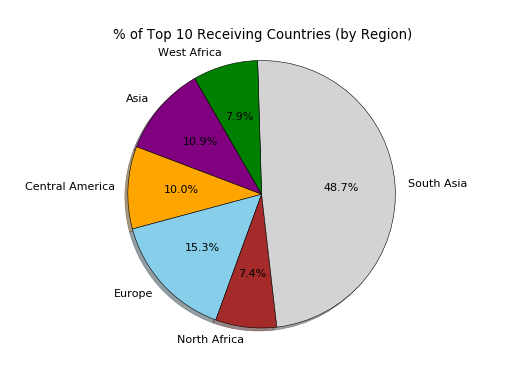

In [133]:
#group by type to be used by all pie charts
by_region = TOP10_REC_NEW.groupby('Region')['Region', 'CountryClass', 'CountryName', '6YRS TOTAL']


fig4 = plt.figure()


#total fare by city
grp2 = by_region.sum()['6YRS TOTAL']

#pie chart build
label2 = grp2.index


#colors and exploe the same for all pie charts, reference here
#colors = [ 'lightskyblue', 'LightCoral']
explode = [0,0,0,0,0,0]
colors = ['purple', 'orange', 'skyblue', 'brown', 'lightgrey','green']
plt.pie(grp2, startangle = 120,  explode = explode, colors=colors,labels = label2, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save chart


#pie chart display
plt.title('% of Top 10 Receiving Countries (by Region)')
plt.axis('equal')
plt.savefig('PR Rec_Top 10_by Region.png')

# MERGING GDP DATA

In [134]:
csv_44 ="Country_GDP.csv"

Data_GDP11 = pd.read_csv(csv_44, encoding="ISO-8859-1")


Data_GDP11.head()
# file has 269 rows (country names) and many missing data

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.0,548888896.0,546666678.0,751111191.0,800000044.0,1.006667e+09,...,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [135]:
# Creating a new dataframe with only necessary columns

GDP_REC = Data_GDP11[['CountryName', 'CountryCode', 'IndicatorName', '2012', '2013', '2014', '2015', '2016', '2017']].dropna(how = 'any')



GDP_REC['6YRS GDP TOTAL'] = (GDP_REC['2012'] /1000000000 + GDP_REC['2013']/1000000000 + GDP_REC['2014']/1000000000 + GDP_REC['2015']/1000000000 + GDP_REC['2016']/1000000000 + GDP_REC['2017']/1000000000)


GDP_REC['YEARLY GDP AVG'] = (GDP_REC['6YRS GDP TOTAL']/6)

GDP_REC.head(2)


,CountryName,CountryCode,IndicatorName,2012,2013,2014,2015,2016,2017,6YRS GDP TOTAL,YEARLY GDP AVG
0,Aruba,ABW,GDP (current US$),2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,15.805028,2.634171
1,Afghanistan,AFG,GDP (current US$),1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,119.450718,19.908453


In [136]:
GDP_REC_TOP10 = GDP_REC.loc[GDP_REC['CountryName'].isin ([ 'India', 'Philippines', 'China', 'Mexico', 'France','Nigeria', 'Egypt, Arab Rep.', 'Pakistan', 'Germany', 'Bangladesh'])]

#print(df.loc[df['A'] == 'foo']) - single row value
#df.loc[df['B'].isin(['one','three'])] - multiple row value 

PR_WRLD_GDP = GDP_REC_TOP10[['CountryName', 'CountryCode', '2012', '2013', '2014', '2015', '2016', '2017', '6YRS GDP TOTAL', 'YEARLY GDP AVG']]

PR_WRLD_GDP

,CountryName,CountryCode,2012,2013,2014,2015,2016,2017,6YRS GDP TOTAL,YEARLY GDP AVG
18,Bangladesh,BGD,1.333560e+11,1.499900e+11,1.728850e+11,1.950790e+11,2.214150e+11,2.497240e+11,1122.449,187.074833
38,China,CHN,8.560550e+12,9.607220e+12,1.048240e+13,1.106470e+13,1.119100e+13,1.223770e+13,63143.570,10523.928333
53,Germany,DEU,3.543980e+12,3.752510e+12,3.890610e+12,3.375610e+12,3.477800e+12,3.677440e+12,21717.950,3619.658333
65,"Egypt, Arab Rep.",EGY,2.793730e+11,2.885860e+11,3.055300e+11,3.326980e+11,3.329280e+11,2.353690e+11,1774.484,295.747333
75,France,FRA,2.683830e+12,2.811080e+12,2.852170e+12,2.438210e+12,2.465130e+12,2.582500e+12,15832.920,2638.820000
107,India,IND,1.827640e+12,1.856720e+12,2.039130e+12,2.102390e+12,2.274230e+12,2.600820e+12,12700.930,2116.821667
152,Mexico,MEX,1.201090e+12,1.274440e+12,1.314560e+12,1.170560e+12,1.077780e+12,1.150890e+12,7189.320,1198.220000
172,Nigeria,NGA,4.593760e+11,5.149660e+11,5.684990e+11,4.945830e+11,4.046500e+11,3.757450e+11,2817.819,469.636500
182,Pakistan,PAK,2.243840e+11,2.312190e+11,2.443610e+11,2.705560e+11,2.786550e+11,3.049520e+11,1554.127,259.021167
185,Philippines,PHL,2.500920e+11,2.718360e+11,2.845850e+11,2.927740e+11,3.048890e+11,3.135950e+11,1717.771,286.295167


In [137]:
combined44=pd.DataFrame.merge( PR_WRLD_GDP, TOP10_REC_NEW, on = ['CountryName']).reset_index()

In [138]:
combined44 = combined44[['CountryName', 'CountryCode', 'Region', 'CountryClass','6YRS TOTAL', '6YRS GDP TOTAL', 'YEARLY AVG', 'YEARLY GDP AVG']]

In [139]:
combined44

,CountryName,CountryCode,Region,CountryClass,6YRS TOTAL,6YRS GDP TOTAL,YEARLY AVG,YEARLY GDP AVG
0,Bangladesh,BGD,South Asia,Developing,85.342167,1122.449,14.223695,187.074833
1,China,CHN,Asia,Developing,173.103233,63143.570,28.850539,10523.928333
2,Germany,DEU,Europe,Developed,97.145065,21717.950,16.190844,3619.658333
3,"Egypt, Arab Rep.",EGY,North Africa,Developing,117.344600,1774.484,19.557433,295.747333
4,France,FRA,Europe,Developed,145.436776,15832.920,24.239463,2638.820000
5,India,IND,South Asia,Developing,409.800754,12700.930,68.300126,2116.821667
6,Mexico,MEX,Central America,Developing,158.394180,7189.320,26.399030,1198.220000
7,Nigeria,NGA,West Africa,Developing,124.983983,2817.819,20.830664,469.636500
8,Pakistan,PAK,South Asia,Developing,104.683000,1554.127,17.447167,259.021167
9,Philippines,PHL,South Asia,Developing,173.768457,1717.771,28.961410,286.295167


# Getting the percentage of the GDP to total remittances received

In [140]:
combined44['PR_Rec/GDP'] = (combined44['YEARLY AVG'] / combined44['YEARLY GDP AVG'])*100

In [141]:
combined44

,CountryName,CountryCode,Region,CountryClass,6YRS TOTAL,6YRS GDP TOTAL,YEARLY AVG,YEARLY GDP AVG,PR_Rec/GDP
0,Bangladesh,BGD,South Asia,Developing,85.342167,1122.449,14.223695,187.074833,7.603211
1,China,CHN,Asia,Developing,173.103233,63143.570,28.850539,10523.928333,0.274142
2,Germany,DEU,Europe,Developed,97.145065,21717.950,16.190844,3619.658333,0.447303
3,"Egypt, Arab Rep.",EGY,North Africa,Developing,117.344600,1774.484,19.557433,295.747333,6.612886
4,France,FRA,Europe,Developed,145.436776,15832.920,24.239463,2638.820000,0.918572
5,India,IND,South Asia,Developing,409.800754,12700.930,68.300126,2116.821667,3.226541
6,Mexico,MEX,Central America,Developing,158.394180,7189.320,26.399030,1198.220000,2.203187
7,Nigeria,NGA,West Africa,Developing,124.983983,2817.819,20.830664,469.636500,4.435487
8,Pakistan,PAK,South Asia,Developing,104.683000,1554.127,17.447167,259.021167,6.735807
9,Philippines,PHL,South Asia,Developing,173.768457,1717.771,28.961410,286.295167,10.115927


In [142]:
combined44['PR_Rec/GDP']

0     7.603211
1     0.274142
2     0.447303
3     6.612886
4     0.918572
5     3.226541
6     2.203187
7     4.435487
8     6.735807
9    10.115927
Name: PR_Rec/GDP, dtype: float64

# % OF RECEIVED PERSONAL REMITTANCES TO COUNTRY GDP

# BUBBLE PLOT

In [150]:
# Sorting dataframe by City type and re-arrange column position

combineD44 = combined44.sort_values('Region', ascending = False)

combined_44 = combined44[['Region','CountryName','YEARLY AVG', 'YEARLY GDP AVG']]
 
combined_44['Class'] = [3, 2, 1, 3, 1, 3,3,3,3,3]
combined_44['C.Class'] = ['LOW', 'MID', 'TOP', 'LOW', 'TOP', 'LOW', 'LOW','LOW', 'LOW', 'LOW']

combined_44 = combined_44.rename(columns={'YEARLY AVG' : "PR_YR_AVG", "YEARLY GDP AVG" : "GDP_YR_AVG"})

combined_44

C:\Users\Ayoola\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Ayoola\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Region,CountryName,PR_YR_AVG,GDP_YR_AVG,Class,C.Class
0,South Asia,Bangladesh,14.223695,187.074833,3,LOW
1,Asia,China,28.850539,10523.928333,2,MID
2,Europe,Germany,16.190844,3619.658333,1,TOP
3,North Africa,"Egypt, Arab Rep.",19.557433,295.747333,3,LOW
4,Europe,France,24.239463,2638.820000,1,TOP
5,South Asia,India,68.300126,2116.821667,3,LOW
6,Central America,Mexico,26.399030,1198.220000,3,LOW
7,West Africa,Nigeria,20.830664,469.636500,3,LOW
8,South Asia,Pakistan,17.447167,259.021167,3,LOW
9,South Asia,Philippines,28.961410,286.295167,3,LOW


<IPython.core.display.Javascript object>


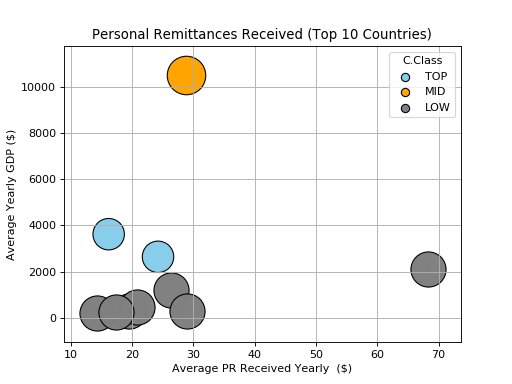

In [151]:
combined_44.plot(kind='scatter', x="PR_YR_AVG", y='GDP_YR_AVG', s=combined_44.Class)

In [152]:
TOP = combined_44[combined_44['C.Class']=='TOP']
MID = combined_44[combined_44['C.Class']=='MID']
LOW = combined_44[combined_44['C.Class']=='LOW']


plt.scatter(TOP['PR_YR_AVG'], TOP['GDP_YR_AVG'],  s = TOP['Class']*800, marker='o', color ='SkyBlue', edgecolor ='black', alpha=0.99, label='TOP' )
plt.scatter(MID['PR_YR_AVG'], MID['GDP_YR_AVG'], s = MID['Class']*600, marker='o', color ='Orange', edgecolor ='black', alpha=0.99, label='MID' )
plt.scatter(LOW['PR_YR_AVG'], LOW['GDP_YR_AVG'], s = MID['Class']*500, marker='o', color ='Grey', edgecolor ='black', alpha=0.99, label='LOW' )
plt.grid()
# labels definition 

plt.title("Personal Remittances Received (Top 10 Countries)")
plt.xlabel("Average PR Received Yearly  ($)")
plt.ylabel("Average Yearly GDP ($)")
# labels definition 

lgnd=plt.legend(title="C.Class", loc = "upper right", frameon = True )
lgnd.legendHandles[0]._sizes=[55]
lgnd.legendHandles[1]._sizes=[55]
lgnd.legendHandles[2]._sizes=[55]

plt.savefig('Bubbleplot PR Received (Top 10 Countries).png')                       


plt.show()

# IMPACT OF PERSOANL REMITTANCES TO OVERALL GDP 

In [161]:
PR_Impact = pd.DataFrame({'Country': combined44['CountryCode'],
                          'PR vs GDP Impact': combined44['PR_Rec/GDP']})

PR_Impact

,Country,PR vs GDP Impact
0,BGD,7.603211
1,CHN,0.274142
2,DEU,0.447303
3,EGY,6.612886
4,FRA,0.918572
5,IND,3.226541
6,MEX,2.203187
7,NGA,4.435487
8,PAK,6.735807
9,PHL,10.115927


<IPython.core.display.Javascript object>


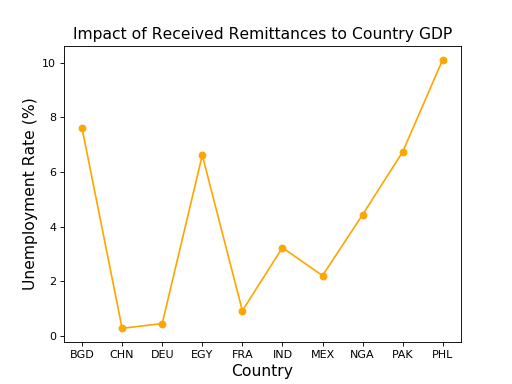

In [162]:
fig8 = plt.figure()

Year = PR_Impact['Country']
Unemployment_Rate = PR_Impact['PR vs GDP Impact']
  
plt.plot(Year, Unemployment_Rate, color='orange', marker='o')
plt.title('Impact of Received Remittances to Country GDP', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.grid(False)
plt.show()